In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='NanumGothic') 
plt.rcParams['axes.unicode_minus'] = False 
from matplotlib import font_manager
# 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  
font_prop = font_manager.FontProperties(fname=font_path)
import json
from konlpy.tag import Okt
from collections import Counter
import itertools

In [2]:
# json 불러오기
file_path = "../chunker/santafe_Owner's_Manual_pdfminer_chunks.json"
data = []

with open(file_path, "r", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))

santafe = pd.DataFrame(data)

# 결과 확인
print(santafe.head())

                                                text      type source_pages  \
0  안전 및 차량 손상 경고\n본 취급설명서에는 고객 및 차량의 안전을 위해 유의해야 ...                    [1]   
1                                          선택 또는 미장착  subtitle          [1]   
2  사양표시\n본 취급설명서에는 모든 트림모델 및 선택 사양을 포함하여 설명하고\n있습...  subtitle          [1]   
3                                        내용 찾기 방법 설명     title          [2]   
4                              내용으로 찾을 때\n목차를 활용하세요.  subtitle          [2]   

  model  
0   싼타페  
1   싼타페  
2   싼타페  
3   싼타페  
4   싼타페  


In [3]:
print(santafe['type'].value_counts())
print("-"*50)
print(santafe['source_pages'].value_counts())
print("-"*50)
print(santafe['model'].value_counts())
print("-"*50)

type
title       448
subtitle    162
              1
Name: count, dtype: int64
--------------------------------------------------
source_pages
[5]                19
[30]                8
[31]                8
[3]                 6
[29]                6
                   ..
[736, 735]          1
[737, 738]          1
[739, 740]          1
[741, 742, 743]     1
[743]               1
Name: count, Length: 512, dtype: int64
--------------------------------------------------
model
싼타페    611
Name: count, dtype: int64
--------------------------------------------------


## 빈도 분석

In [5]:
# 1. Okt 형태소 분석기 초기화
okt = Okt()

# 2. 텍스트 데이터
santafe_texts = santafe['text'].tolist()

# 3. 각 문장을 형태소 분석하여 단어 단위로 나누기
santafe_tokenized = [okt.nouns(text) for text in santafe_texts]  # 명사 추출

# 불용어 처리 
stopwords = ['수', '를', '고', '이', '경', '주', '중', '시오', '의', '후', '시', '수', 
             '등', '때', '및', '경우','로']

# 4. 불용어 제거
santafe_filtered_tokens = [
    [word for word in sentence if word not in stopwords] for sentence in santafe_tokenized
]

# 5. 단어 빈도 집계 (불용어 제거 후 단어 리스트 사용)
santafe_flat_tokens = list(itertools.chain.from_iterable(santafe_filtered_tokens))  # 리스트 평탄화
santafe_word_freq = Counter(santafe_flat_tokens)

# 6. 상위 50개 단어 출력
santafe_top_n = 50
santafe_top_words = santafe_word_freq.most_common(santafe_top_n)

# 출력
for word, freq in santafe_top_words:
    print(f'{word}: {freq}')

차량: 1596
작동: 1406
주행: 1072
상태: 1007
보조: 957
표시: 837
시동: 837
기능: 744
사용: 686
시스템: 634
설정: 629
버튼: 604
좌석: 575
장치: 554
주차: 507
도어: 495
경고: 492
점검: 492
타이어: 487
브레이크: 486
스마트: 473
속도: 471
충돌: 467
키: 467
전방: 466
자동: 450
운전: 440
운전자: 436
조절: 417
엔진: 397
방지: 394
안전: 389
해제: 382
이상: 375
주의: 371
센서: 370
석: 358
차: 342
고등: 341
확인: 327
위치: 327
스위치: 320
차로: 313
에어백: 306
클러스터: 305
휠: 305
모드: 302
페달: 285
센터: 284
다음: 283


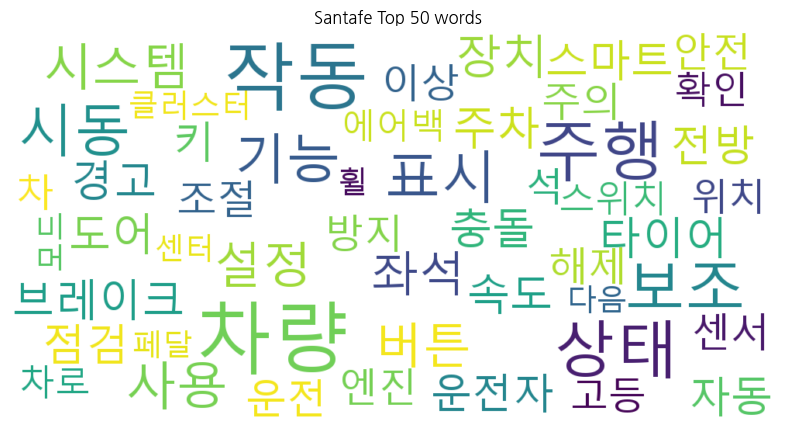

In [6]:
from wordcloud import WordCloud
# 1. top_words를 dict 형태로 변환
santafe_top_words_dict = dict(santafe_top_words)

# 2. 워드 클라우드 시각화
santafe_wordcloud = WordCloud(width=1000, height=500, background_color='white',
                      font_path='C:/Windows/Fonts/malgun.ttf', 
                      max_font_size=100,  # 글자 크기 제한
                      min_font_size=20,   # 최소 글자 크기
                      prefer_horizontal=0.9).generate_from_frequencies(santafe_top_words_dict)

# 3. 시각화 출력
plt.figure(figsize=(10, 6))
plt.imshow(santafe_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Santafe Top 50 words")
plt.show()


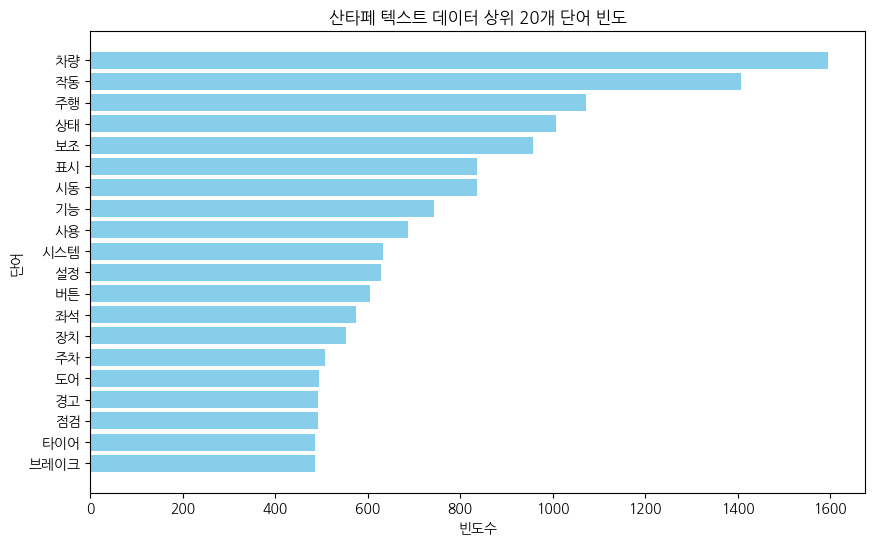

In [7]:
# 산타페 상위 50개 단어를 막대그래프로 시각화
santafe_top_words2 = santafe_word_freq.most_common(20)
santafe_top_words_dict2 = dict(santafe_top_words2)
santafe_words, santafe_counts = zip(*santafe_top_words2)# 단어와 빈도를 분리

plt.figure(figsize=(10, 6))
plt.barh(santafe_words, santafe_counts, color='skyblue')
plt.xlabel('빈도수')
plt.ylabel('단어')
plt.title('산타페 텍스트 데이터 상위 20개 단어 빈도')
plt.gca().invert_yaxis()  # 상위 단어가 위에 오도록 설정
plt.show()

## TF-IDF

차량: 28.3632
보조: 26.6941
작동: 24.9839
표시: 23.4814
주행: 22.8570
상태: 18.8655
시동: 18.5741
점검: 17.8063
좌석: 17.1391
기능: 16.4004
전방: 15.8744
타이어: 15.8536
장치: 15.5893
경고: 15.4857
설정: 15.1887
시스템: 15.1856
고등: 15.1705
버튼: 14.8108
충돌: 14.2313
엔진: 13.9716
조절: 13.8771
브레이크: 13.7498
스마트: 13.6999
도어: 13.5851
주차: 13.5558
사용: 13.2682
에어백: 13.0575
속도: 12.8317
클러스터: 12.5726
안전: 12.2755
운전자: 12.1171
차로: 11.9884
운전: 11.7136
자동: 11.4717
센서: 10.6902
방지: 10.6653
스위치: 10.5653
게이트: 10.5269
모드: 10.1524
페달: 10.0343
주의: 10.0000
측방: 9.8957
이상: 9.8401
배터리: 9.4200
스티: 9.2787
후방: 9.0959
해제: 9.0663
시트: 8.9014
제한: 8.4774
확인: 8.4693


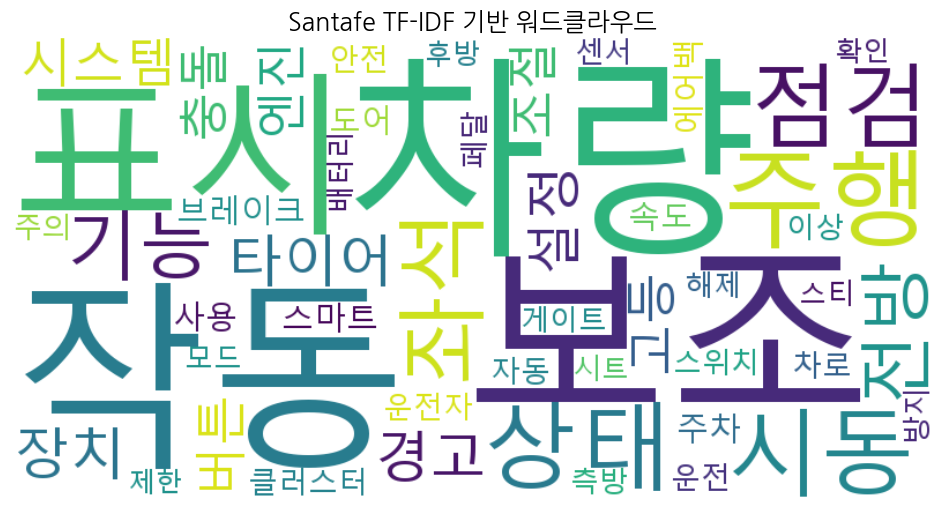

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 문서별로 띄어쓰기 기준으로 연결
santafe_docs = [' '.join(tokens) for tokens in santafe_filtered_tokens]

# 2. TF-IDF 벡터화
santafe_vectorizer = TfidfVectorizer()
santafe_X = santafe_vectorizer.fit_transform(santafe_docs)

# 3. 단어와 점수 추출
santafe_words = santafe_vectorizer.get_feature_names_out()
santafe_scores = santafe_X.sum(axis=0).A1  # 각 단어의 TF-IDF 점수 합계
santafe_word_scores = dict(zip(santafe_words, santafe_scores))

santafe_top_50 = sorted(santafe_word_scores.items(), key=lambda x: x[1], reverse=True)[:50]
for santafe_word, santafe_score in santafe_top_50:
    print(f"{santafe_word}: {santafe_score:.4f}")
# 4. 워드클라우드 시각화
# top_50이 리스트 형태일 때 → dict로 변환
santafe_top_50_dict = dict(santafe_top_50)

# 워드클라우드 생성
santafe_wordcloud = WordCloud(
    font_path='malgun.ttf',
    width=800, height=400,
    background_color='white'
).generate_from_frequencies(santafe_top_50_dict)

# 시각화
plt.figure(figsize=(12, 6))
plt.imshow(santafe_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Santafe TF-IDF 기반 워드클라우드", fontsize=18)
plt.show()


## 네트워크 그래프

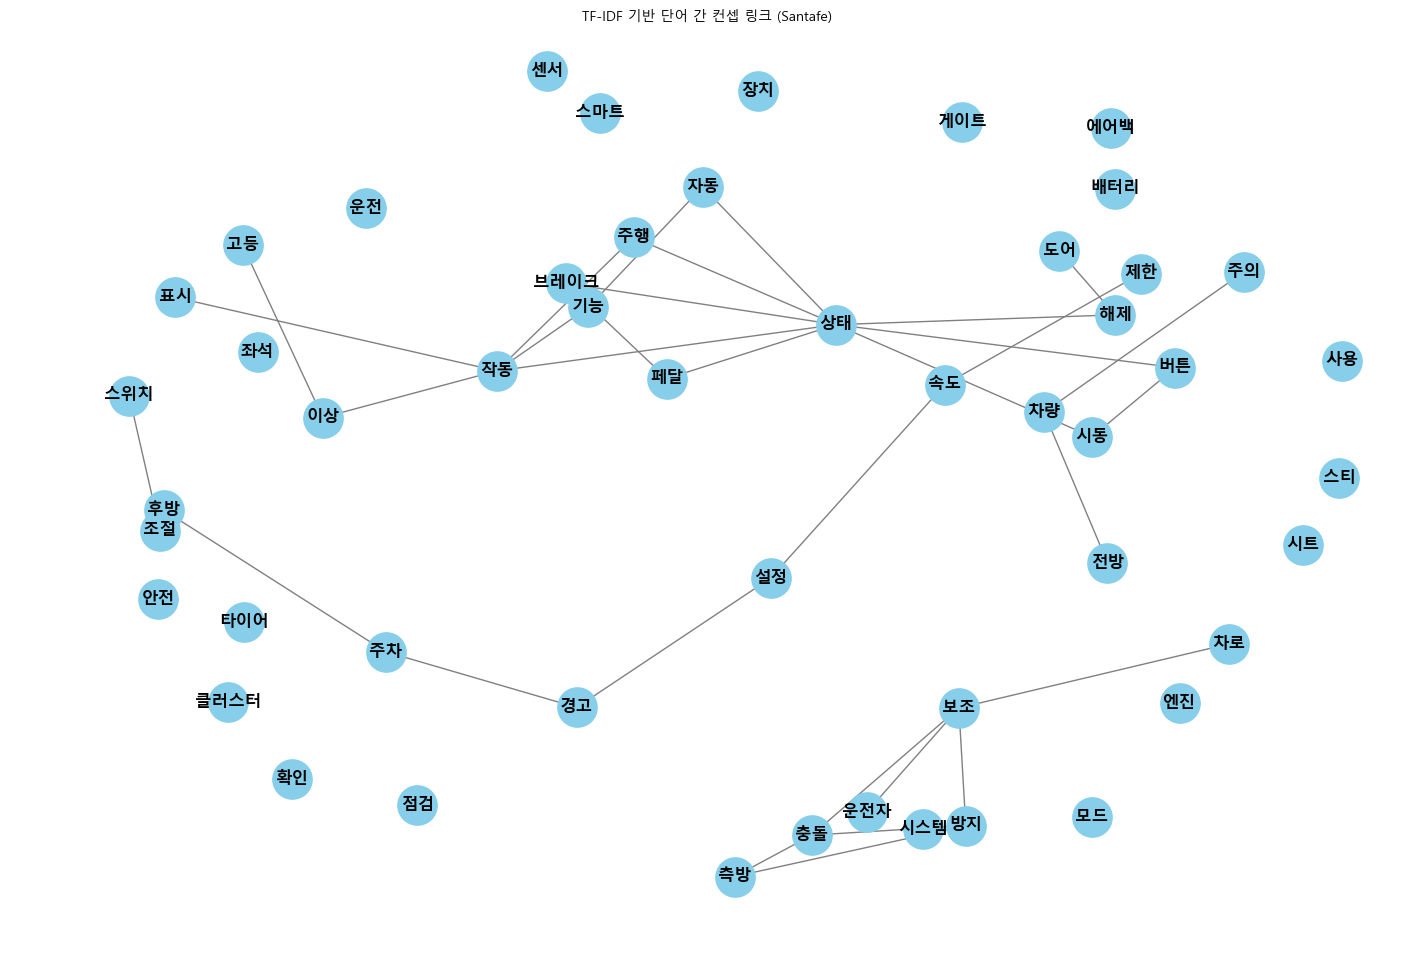

In [10]:
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity


# 1. santafe_top_50 단어 리스트와 인덱스 추출
santafe_top_words = [word for word, score in santafe_top_50]
santafe_top_indices = [santafe_vectorizer.vocabulary_[word] for word in santafe_top_words]

# 2. 각 단어의 TF-IDF 벡터 추출 (문서 수 만큼 있는 벡터를 단어별로 전치)
santafe_word_vectors = santafe_X[:, santafe_top_indices].T.toarray()  # shape: (50, num_docs)

# 3. 단어 간 코사인 유사도 계산
santafe_similarity_matrix = cosine_similarity(santafe_word_vectors)

# 4. 네트워크 그래프 생성
santafe_G = nx.Graph()

# 노드 추가
for word in santafe_top_words:
    santafe_G.add_node(word)

# 엣지 추가 (유사도 임계값 이상일 때만)
santafe_threshold = 0.4  # 유사도 기준 (필요에 따라 조절 가능)
for i in range(len(santafe_top_words)):
    for j in range(i + 1, len(santafe_top_words)):
        sim = santafe_similarity_matrix[i][j]
        if sim >= santafe_threshold:
            santafe_G.add_edge(santafe_top_words[i], santafe_top_words[j], weight=sim)

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 말굽 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 시각화
plt.figure(figsize=(18, 12))
santafe_pos = nx.spring_layout(santafe_G, k=0.5, seed=42)
nx.draw_networkx_nodes(santafe_G, santafe_pos, node_color='skyblue', node_size=800)

nx.draw_networkx_labels(
    santafe_G, santafe_pos,
    font_size=12,
    font_weight='bold',
    font_family=font_prop.get_name()
)

nx.draw_networkx_edges(santafe_G, santafe_pos, edge_color='gray')

plt.title("TF-IDF 기반 단어 간 컨셉 링크 (Santafe)", fontsize=16, fontproperties=font_prop)
plt.axis('off')
plt.show()


## 청크 오류 확인

In [12]:
# 조사로 끝나는 text 청크 확인
import re

def is_cut_off(text):
    return bool(re.search(r'(는|가|을|를|에|으로|에게|와|과)$', text.strip()))

santafe['cut_off'] = santafe['text'].apply(is_cut_off)
santafe_cut = santafe[santafe['cut_off']]
print(santafe_cut[['text']])

Empty DataFrame
Columns: [text]
Index: []


In [13]:
# 특수기호로 시작하는 청크 확인
# '-', '*', ',', '.' 로 시작하는 텍스트 필터링
special_start = santafe[santafe['text'].str.match(r'^[-\*,\.]')]

# 결과 확인
print(special_start[['text']])

Empty DataFrame
Columns: [text]
Index: []


In [14]:
from transformers import GPT2LMHeadModel, PreTrainedTokenizerFast
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm

# tqdm 적용
tqdm.pandas()

# 1. KoGPT 불러오기
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2")
model = GPT2LMHeadModel.from_pretrained("skt/kogpt2-base-v2")
model.eval()

# 2. Perplexity 계산 함수
def get_perplexity(text):
    try:
        if len(text) < 100:  # 100자 미만은 계산 안 함
            return np.nan
        encodings = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        input_ids = encodings.input_ids
        with torch.no_grad():
            outputs = model(input_ids, labels=input_ids)
            loss = outputs.loss
        return np.exp(loss.item())
    except:
        return np.nan

# 3. 전체 텍스트에 대해 perplexity 계산 (100자 이상만)
santafe['perplexity'] = santafe['text'].progress_apply(get_perplexity)

# 4. Perplexity 기준 상위 10개 출력 (문제가 의심되는 문장)
problematic_texts = santafe.sort_values(by='perplexity', ascending=False).head(10)
print(problematic_texts[['text', 'perplexity']])


c:\Users\jeongbin\Projects\hyundai_reg_bot\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
100%|██████████| 611/611 [11:55<00:00,  1.17s/it]

                                                  text  perplexity
253  Ł\n가능한 원인\n해결책\n속 상승하면 디지털 센터\n미러가 꺼지게 됩니다.)\n...  182.252454
575  ĝ\n배터리에 부식성이 높은 유황성 산이 있어 신체, 옷, 페인트 부분에 닿으면 위...  125.528926
481  후방 모니터 설정\n경고 방식\n2C_WarningVolumnParkingSafet...  122.303269
81   •\n운전석 주변은 항상 깨끗하게 유지하십시오. 빈 깡통 등이 페달 밑으로 굴러 들...  107.746058
523  8\n2C_HowToInstallTripod\n케이스에서 고장 자동차 정지 표지판(...  105.559026
324  5\n•\n•\n•\n바깥 공기 흡입구에 눈과 얼음 또는 젖은 오물(낙엽 등) 등을...   98.546403
194  `\n비상 경고등 버튼을 누르면 양쪽 방향지시등이 같이 깜빡입니다.\n135\n방향...   88.887196
170  G\n연료 부족 경고등은 남은 연료량이 적을 때 노란색으로 켜지고, 차량에 적용된 ...   83.725464
196  _\n미등 표시등은 조명 스위치를 미등 위치에 두었을 때 켜집니다.\n조명 스위치가...   82.054208
323  실외 측 유리 성에 제거 방법\n2C_InsideDefrostProcedure_2\...   81.460587


In [3]:
a=[253, 575, 481, 81, 523]
for i in (a):
    print(santafe.loc[i,'text'])
    print('='*50)

Ł
가능한 원인
해결책
속 상승하면 디지털 센터
미러가 꺼지게 됩니다.)
니다.) 미러가 차가워도 아이콘이
사라지지 않으면 당사 직영 하이
테크센터나 블루핸즈에 문의해 점
검을 받으십시오.
디지털 모드 아이콘이 꺼지고 영상에러
아이콘이 표시됩니다.
ĝ
배터리에 부식성이 높은 유황성 산이 있어 신체, 옷, 페인트 부분에 닿으면 위험합니다.
전해액이 눈에 들어가면 적어도 15분 동안 흐르는 깨끗한 물로 닦아내고 즉시 의료 조치를 받으십
시오. 또한 피부에 닿으면 닿은 부분을 깨끗이 씻어 내십시오. 아프거나 화상을 입은 감각이 들면
즉시 의료 조치를 받으십시오.
후방 모니터 설정
경고 방식
2C_WarningVolumnParkingSafetySetInfo 시동 'ON' 상태에서 인포테인먼트 시스템의 설정 > 차량 > 운전자 보조 > 경고 방식을 차례로 선 택하십시오. •
주차 안전 우선: 안전한 주차를 위하여 후방 모니터 작동 중에는 오디오 음량을 줄입니다.
550
•
운전석 주변은 항상 깨끗하게 유지하십시오. 빈 깡통 등이 페달 밑으로 굴러 들어갈 경우 페달
조작이 불가능하게 되어 매우 위험합니다.
바닥 매트는 페달의 움직임을 방해하지 않는 것으로 너무 두껍지 않으면서 바닥에 고정되는 제
품이어야 합니다.
차 안에는 화물을 좌석 높이 이상으로 적재하지 마십시오.
•
•
24
안전 및 주의 사항
8
2C_HowToInstallTripod
케이스에서 고장 자동차 정지 표지판(안전 삼각대)을 꺼내 좌우 날개를 올려 삼각형으로 맞춘 후
서로 교차하게 연결 홈에 고정하십시오.
고장 자동차 정지 표지판(안전 삼각대) 아래쪽에 있는 네 개의 다리를 좌우로 펼쳐 차량 뒤에서 접
근하는 자동차의 운전자가 고장 차량을 확인할 수 있는 위치에 넘어지지 않게 세우십시오.
고장 자동차 정지 표지판(안전 삼각대)을 설치할 때는 통행 차량에 주의하여 안전하게 설치하십시 오.
616
비상시 응급 조치


# 별 문제 없는거 같음.

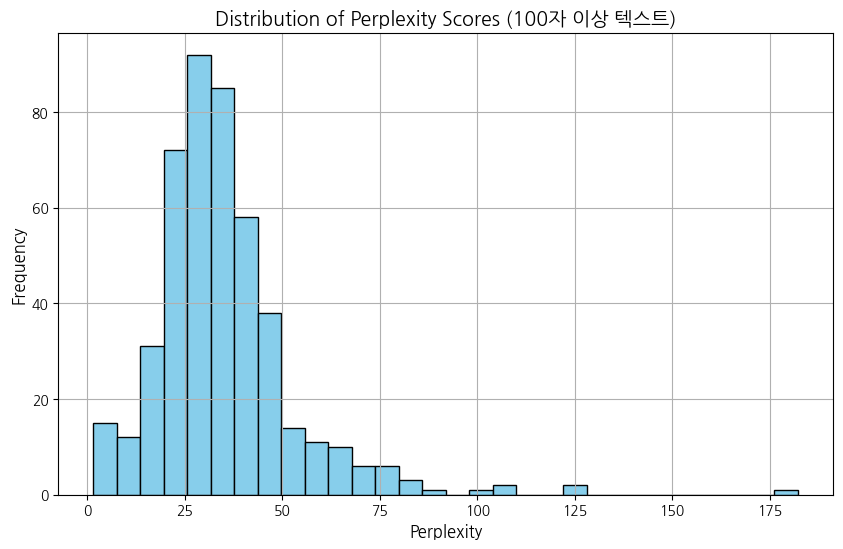

In [16]:
import matplotlib.pyplot as plt

# NaN 제거
valid_perplexities = santafe['perplexity'].dropna()

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(valid_perplexities, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Perplexity Scores (100자 이상 텍스트)', fontsize=14)
plt.xlabel('Perplexity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()